# Lecture 9: `numpy`, `scipy`, and `matplotlib`

## `numpy`
- `numpy` is a library for fast numerical computation.
- `numpy` implements mathematical operations and functions in the C language and allows us to use this code with a python interface.
- `numpy` is fast compared to the python standard library
- It is a third party library (not part of the official python standard library)
```python
import numpy as np
```

### `numpy` `ndarray` class
- The core of `numpy` is the `ndarray` class
- `ndarrays` are matrices of python objects.
- Generally the values that they contain will all be the same time, usually `int32`, `int64`, or `float64`
- You can see what type of values are stored in a `ndarray` with the `dtype` attribute

In [1]:
import numpy as np
a = np.array(range(10))
repr(a)

'array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])'

In [2]:
print(type(a))
a.dtype

<class 'numpy.ndarray'>


dtype('int32')

### `ndarray` objects
- `numpy` arrays can be 1, 2, 3, ... n dimensions
- You can see the dimensions of a `ndarray` with the `shape` attribute
    - If the array is 1 dimensional: `shape` is a `tuple`: (rows,)
    - If the array is 2 dimensional: `shape` is a `tuple`: (rows,columns)
    - If the array is 3 dimensional: `shape` is a `tuple`: (layers, rows, columns)
        - In a 3D array every layer must have the same number of rows and number of columns
- The number of values in a array is stored in the `size` attribute

In [3]:
# 1D array
a = np.array(range(3))
print(a)
a.shape

[0 1 2]


(3,)

In [4]:
# 2D array
a = np.array([range(3),range(3,6),range(6,9)])
print(a)
a.shape

[[0 1 2]
 [3 4 5]
 [6 7 8]]


(3, 3)

In [5]:
# 3D array
a = np.array([[range(3),range(3,6),range(6,9)]]*4)
print(a)
a.shape

[[[0 1 2]
  [3 4 5]
  [6 7 8]]

 [[0 1 2]
  [3 4 5]
  [6 7 8]]

 [[0 1 2]
  [3 4 5]
  [6 7 8]]

 [[0 1 2]
  [3 4 5]
  [6 7 8]]]


(4, 3, 3)

In [6]:
# a contains 4 layers of 3 rows and 3 columns (4*3*3) = 36 values
a.size

36

In [7]:
# 4D array, videos are often encoded as 4d arrays
a = np.array([[[[0,1,2],[3,4,5]]]*2]*3)
print(a)
print(a.shape)

[[[[0 1 2]
   [3 4 5]]

  [[0 1 2]
   [3 4 5]]]


 [[[0 1 2]
   [3 4 5]]

  [[0 1 2]
   [3 4 5]]]


 [[[0 1 2]
   [3 4 5]]

  [[0 1 2]
   [3 4 5]]]]
(3, 2, 2, 3)


In [8]:
# ndim attribute is the number of dimensions in the array
a.ndim

4

### `ndarray` class attributes
- `size` number of values in the array
- `shape` the dimensions of the array
- `ndim` number of dimensions of the array
- `flat` values in the array as a 1D iterable
- `dtype` data type of the arrays elements
- Refer to [`numpy.ndarray` documentation](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) for a full list of attributes and methods

### Defining `ndarrays`
- You can create an instance of `ndarray` using `np.array()`
- You can specify values with an iterable like a `list` as shown above
- Multidimensional arrays can be specified by nested iterables AKA `lists` of `lists`
    - For a 2D array, each sublist will become a row of the `ndarray`
- `numpy` also has several functions for generating `ndarrays` with certain properties
    - `np.arange()`
    - `np.linspace()`
    - `np.zeros()` and `np.ones()`

In [9]:
# defining a numpy array with a list of lists
a = np.array([[0,1,2],[3,4,5]])
print(a)

[[0 1 2]
 [3 4 5]]


In [10]:
# numpy.arange is like range for 1D numpy arrays
np.arange(0,5,.25)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75])

In [14]:
# get a 1D array for n evenly spaced values between over an interval
np.linspace(0,2,9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [15]:
# create a 2D array of float64 zeros
np.zeros(shape=(3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [16]:
# create a 2D array of int32 zeros
np.zeros(shape=(3,4),dtype=int)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [17]:
# ones works the same way
np.ones(shape=(2,3),dtype='int64')

array([[1, 1, 1],
       [1, 1, 1]], dtype=int64)

[array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]]), array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8],
       [9, 9, 9, 9]])]


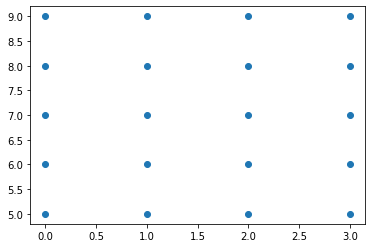

In [18]:
# get coordinates of 2D grid
mg = np.meshgrid(np.arange(4),np.arange(5,10))
print(mg)
# plot the points of the grid
import matplotlib.pyplot as plt
p = plt.scatter(mg[0].flatten(),mg[1].flatten())
plt.show(p)

### `ndarray` methods
- `all` and `any`
- `sum`
- `std`
- `mean`
- `flatten`
- `reshape`
- `transpose` or `T` attribute
    - flip rows and columns

In [20]:
# any and all
a = np.arange(10)
print(a)
# all() will return False because there is a zero in the array
print(a.all())
print(a.any())

[0 1 2 3 4 5 6 7 8 9]
False
True


In [22]:
# reshape
a = np.arange(12)
print(a)
b = a.reshape(4,3)
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [23]:
# C vs Fortran style ordering

# C style ordering fills in row by row
print(a.reshape(4,3,order='C'))

# Fortran style ordering fills in column by columns
print(a.reshape(4,3,order='F'))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [24]:
# flattening multidimensional arrays to 1D
print(b)
# 2 ways
print(b.reshape(-1))
print(b.flatten())

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [25]:
# Transposing arrays
print(b)
print(b.T)
print(b.transpose())

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  3  6  9]
 [ 1  4  7 10]
 [ 2  5  8 11]]
[[ 0  3  6  9]
 [ 1  4  7 10]
 [ 2  5  8 11]]


In [26]:
# math methods
print(b.sum())
print(b.mean())
print(b.std())

66
5.5
3.452052529534663


In [27]:
# min finds minimum value argmin finds index of minimum value
b = b.flatten()[::-1]
print(b)
print(b.min())
print(b.argmin())
print(b.max())
print(b.argmax())

[11 10  9  8  7  6  5  4  3  2  1  0]
0
11
11
0


### applying `ndarray` methods across rows or columns
- Calling a function usually applies it to the entire array
- the `axis` argument allows you to apply the function to each column or row
- columns: `axis=0`
- rows: `axis=1`

In [29]:
# apply math method across columns
a = np.arange(12)
b = a.reshape(4,3)
print(b)
b.sum(axis=0)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([18, 22, 26])

In [30]:
# apply math method across rows
b.sum(axis=1)

array([ 3, 12, 21, 30])

### `numpy` array indexing
- For 1D arrays, indexing is similar to lists
- For 2D arrays, indexing is `a[row,column]`
    - If a 2D array is indexed with only a single value or slice it will be interpreted as row values
        - ```a[0]``` would return the first row of array `a`
- Standard rules of python indexing and slicing apply to row indices and column indices
- You can reassign values in an array using their indices

In [31]:
# 1D arrays are indexed just like lists
a = np.arange(10)
print(a)
# first 5 values
a[:5]

[0 1 2 3 4 5 6 7 8 9]


array([0, 1, 2, 3, 4])

In [32]:
# 2D arrays have row,column indexing
a = np.arange(20).reshape(5,4)
print(a)
# this will return the second row
a[1]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


array([4, 5, 6, 7])

In [33]:
# row, column indexing
a[:3,1:3]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [34]:
# Get a single value
a[3,2]

14

In [35]:
# set the value at 0,0 equal to 100
a[0,0] = 100
print(a)

[[100   1   2   3]
 [  4   5   6   7]
 [  8   9  10  11]
 [ 12  13  14  15]
 [ 16  17  18  19]]


In [36]:
# replace the second row
a[1] = [-1,-2,-3,-4]
print(a)

[[100   1   2   3]
 [ -1  -2  -3  -4]
 [  8   9  10  11]
 [ 12  13  14  15]
 [ 16  17  18  19]]


In [37]:
# replace a slice of values
a[-2:,-2:] = np.zeros((2,2))
print(a)

[[100   1   2   3]
 [ -1  -2  -3  -4]
 [  8   9  10  11]
 [ 12  13   0   0]
 [ 16  17   0   0]]


### `numpy` Universal Functions (ufuncs)
- `numpy` operations are much faster than using loops
- Universal functions operate on whole arrays element by element
    - much faster than loops
    - written in C
- Standard elementwise math operations are ufuncs
- Matrix mathematical operations are also ufuncs
- Refer to the [numpy documentation for a full list of ufuncs](https://numpy.org/doc/stable/reference/ufuncs.html).

In [38]:
a = np.arange(1,10).reshape(3,3)
print(a)
# np.log2 is a ufunc
np.log2(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[0.        , 1.        , 1.5849625 ],
       [2.        , 2.32192809, 2.5849625 ],
       [2.80735492, 3.        , 3.169925  ]])

In [39]:
# multiplication is a ufunc
b = a * 2
print(b)

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


In [40]:
# another way of multiplication
b = np.multiply(a,2)
print(b)

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


In [42]:
# addition
# c = np.add(a,b) is equivalent to c = a + b
print(a)
print(b)
c = a + b
print(c)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
[[ 3  6  9]
 [12 15 18]
 [21 24 27]]


In [43]:
c = np.subtract(a,b)
print(c)

[[-1 -2 -3]
 [-4 -5 -6]
 [-7 -8 -9]]


In [44]:
# matrix multiplication
c = np.matmul(a,b)
print(c)

[[ 60  72  84]
 [132 162 192]
 [204 252 300]]


### `numpy` broadcasting rules
- If you try to give 2 arrays with different dimensions to a ufunc `numpy` will attempt to "broadcast" or stretch the array with smaller dimensions to match the array with larger dimensions
    - This is desirable for 2 reasons
        1. Broadcasting does not create copies of the values which helps save memory when working with Big Data
        2. Broadcasting allows for fast computation with `numpy` ufuncs.
- Let's say you have a `numpy` `ndarray` and you are adding a single scalar value to it, this is equivalent to adding an array with the same dimension as the first with that single scalar value comprising every element 
![](https://numpy.org/doc/stable/_images/broadcasting_1.png)

In [45]:
# adding a scalar value to an array
a = np.arange(9).reshape(3,3)
print(a)
a + 3

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

`a + 3` is equivalent to `a + b` where b is a 3 x 3 array of 3s

In [46]:
b = 3 * np.ones((3,3),dtype=int)
print(a)
print(b)
a + b

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]


array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

### `numpy` Broadcasting rules
- 2 `ndarrays` are compatible if dimensions are either the same or one dimension is 1
- If 1 array has fewer dimensions than the other its dimensions are padded with ones from the left

In [47]:
A = np.ones((5,4)) * 5
B = np.arange(1,5)
print(A)
print(B)
print(A + B)

[[5. 5. 5. 5.]
 [5. 5. 5. 5.]
 [5. 5. 5. 5.]
 [5. 5. 5. 5.]
 [5. 5. 5. 5.]]
[1 2 3 4]
[[6. 7. 8. 9.]
 [6. 7. 8. 9.]
 [6. 7. 8. 9.]
 [6. 7. 8. 9.]
 [6. 7. 8. 9.]]


### `numpy` Broadcasting rules
- When you match the dimensions between arrays they must have either the same number or one of them must be equal to 1
- If these conditions are not met then you will get an error when you apply a ufunc to 2 arrays with incompatible dimensions

![](https://numpy.org/doc/stable/_images/broadcasting_2.png)

![](https://numpy.org/doc/stable/_images/broadcasting_3.png)

### `numpy.newaxis`
- `numpy.newaxis` is an alias of `None`
- You can use it to raise the dimensionality of an array
- For example you can turn a 1D row vector into a 2D column vector
    - This can come in handy when you need to broadcast arrays

In [48]:
a = np.arange(5)
print(a)
print(a.shape)

[0 1 2 3 4]
(5,)


In [49]:
print(a[:,np.newaxis])
print(a[:,np.newaxis].shape)

[[0]
 [1]
 [2]
 [3]
 [4]]
(5, 1)


In [50]:
# numpy.newaxis is just a None object
print(a[:,None])
print(np.newaxis is None)

[[0]
 [1]
 [2]
 [3]
 [4]]
True


### numpy indexing with arrays and lists
- You can use an array or a list to index a dimension of a `ndarray`

In [51]:
a = np.arange(20).reshape(5,4)
print(a)
row_indices = np.array([1,3,4])
col_indices = np.array([2,3])
print(a[row_indices])
print(a[:,col_indices])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[[ 4  5  6  7]
 [12 13 14 15]
 [16 17 18 19]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]]


In [52]:
# row
print(a[row_indices[:,np.newaxis],col_indices])

[[ 6  7]
 [14 15]
 [18 19]]


### Masking arrays with Boolean values
- A mask is an array of Boolean values that tell you if the values in an array are valid or invalid
- We can use Boolean masks to index numpy arrays

In [53]:
a = np.arange(20).reshape(5,4)
print(a)
mask = np.array([0,1,1,0,0],dtype=bool)
print(mask)
# print second and third line of a
print(a[mask,:])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[False  True  True False False]
[[ 4  5  6  7]
 [ 8  9 10 11]]


### Using comparisons for indexing
- We can take advantage of Boolean masks to use comparison expressions to index our arrays
- When using Boolean comparison expressions with `numpy` arrays we have to use elementwise boolean operators
    - `&` instead of `and`
    - `|` instead of `or`
    - `~` is elementwise negation (`True` -> `False` and `False` -> `True`)

In [54]:
boolean_array = np.array([True,False,True,False])
~boolean_array

array([False,  True, False,  True])

In [56]:
a = np.arange(20).reshape(5,4)
print(a)
b = np.array([2,5,6,9,20])
print(b % 2 == 0)
# get rows of a where b is divisible by 2
a[b % 2 == 0]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[ True False  True False  True]


array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [16, 17, 18, 19]])

In [57]:
# get rows of a where b is divisible by 2 and b is greater 6
print((b % 2 == 0) & (b > 6))
a[(b % 2 == 0) & (b > 6)]

[False False False False  True]


array([[16, 17, 18, 19]])

## `scipy` 
- `scipy` is a Python module that has many useful functions and classes for science
- We will use the `stats` module in `scipy` in the final homework

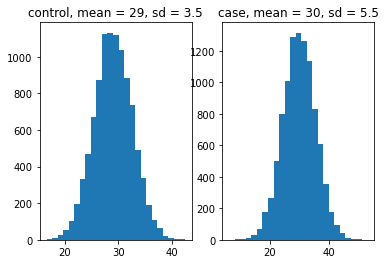

In [58]:
from matplotlib import pyplot as plt

control = np.random.normal(29,3.5,size=10000)
case = np.random.normal(30,5.5,size=10000)

splots = plt.subplot(1,2,1)
plt.hist(control,bins=25)
plt.title('control, mean = 29, sd = 3.5')

plt.subplot(1,2,2)
plt.hist(case,bins=25)
plt.title('case, mean = 30, sd = 5.5')
plt.show()

In [59]:
from scipy.stats import ttest_ind
ttest_obj = ttest_ind(case,control)
print(ttest_obj)
print(ttest_obj.pvalue)

Ttest_indResult(statistic=13.769165520358023, pvalue=6.134967074528365e-43)
6.134967074528365e-43


### **Important: `ttest_ind` can work on two 2D arrays of the same dimensions**
- In this case it will give a pvalue and t-statistic for each column

In [62]:
control = np.random.normal(29,3.5,size=(10,20))
case = np.random.normal(30,5.5,size=(10,20))
result = ttest_ind(control,case)
print(result)
len(result.pvalue)

Ttest_indResult(statistic=array([ 0.01281363, -0.26978191, -0.48614553, -1.95949661, -0.91800748,
       -0.83137762, -1.17938716,  0.78389986,  0.11356095,  0.08758357,
       -0.86033415, -0.49159115, -2.37964657,  0.03150533, -1.51540163,
       -0.98436685, -1.07348042, -0.05799398, -1.66473603, -1.18271617]), pvalue=array([0.98991744, 0.7903966 , 0.63272968, 0.06572703, 0.37075272,
       0.41665321, 0.25359817, 0.4432927 , 0.91084287, 0.93117468,
       0.40091932, 0.62894927, 0.02859527, 0.97521326, 0.14703467,
       0.33798265, 0.29723664, 0.95439239, 0.1132753 , 0.25230907]))


20

## Plotting with `matplotlib`
- `matplotlib` is a module for plotting data
- Other plotting libraries like `seaborn` are built on top of `matplotlib`
- `matplotlib` has 2 different interfaces
    - The `pyplot` module is modeled after MATLAB plotting
    - The other plotting interface is based on objects and is more Python-style
- If you are in the ipython console you can display the plot with the `pyplot.show()` function
- `matplotlib` plotting functions can take `numpy` `ndarray` objects or other iterables as inputs

### `pyplot` examples
- `pyplot` is basically the same as MATLAB
- Check out the [`pyplot` documentation](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) for more information

In [63]:
import matplotlib.pyplot as plt

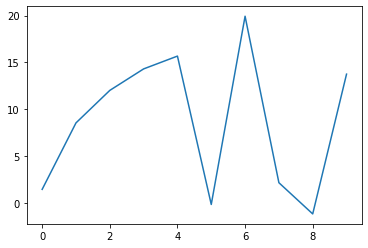

In [64]:
# regular line plot
x = np.arange(10)
y = np.random.normal(6,10.5,10)
p = plt.plot(x,y)

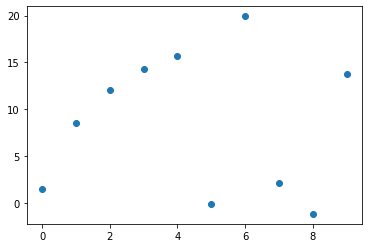

In [65]:
# scatter plot
p_scatter = plt.scatter(x,y)

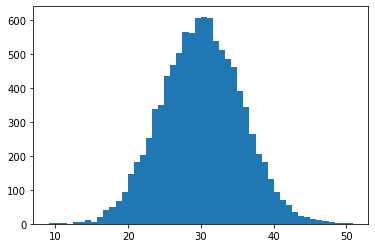

In [69]:
# histogram
h = np.random.normal(30,5.5,10000)
h_plot = plt.hist(h,bins=50)

(0.0, 15.0)

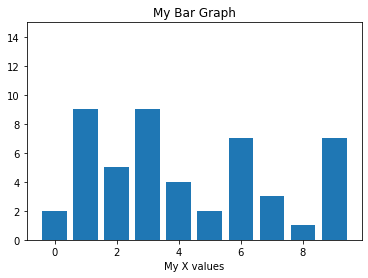

In [70]:
# bar plot
values = np.random.randint(1,10,10)
plt.bar(x = np.arange(10), height = values)
# add a title
plt.title('My Bar Graph')
# add an xlabel
plt.xlabel('My X values')
# change the y axis limits
plt.ylim(0,15)

### Saving Plots
- In your code you can save plots as files using the `pyplot.savefig()` function
- It will take a filename with an image filetype extension as input
- Sometimes labels will get cutoff so you can use the `pad_inches` argument to add whitespace around your figure to keep it from getting cut off
- `dpi` argument is dots per inches and controls the resolution of your saved plot image
```python
plt.savefig('my_bar_graph.png',dpi=300,pad_inches=.5)
```

### Object oriented `matplotlib` interface
- `matplotlib.figure.Figure` objects have associated methods and attributes
- `figure` objects can contain `axes` objects
- `axes` objects have different kinds of plots as methods

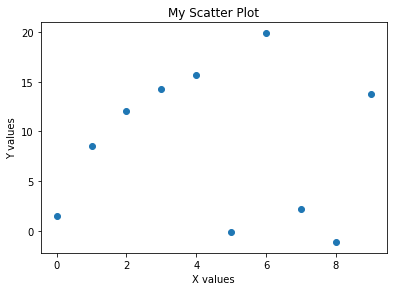

In [71]:
import matplotlib as mpl
fig = mpl.figure.Figure()
ax = fig.add_axes(rect = (.1,.1,.8,.8))
# specifying relative coordinates (0-1) in the figure of the axes
# rect = (left,bottom,width,height)
ax.scatter(x,y)
# you can use axis.set_... methods to add titles, or labels, etc
ax.set_title('My Scatter Plot')
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
# display the figure in jupyter
fig

### Figure objects
- In ipython you can display `Figure` objects with the `Figure.show()` method
- You can save Figure objects with the `Figure.savefig()` method that works just like `pyplot.savefig()`
- I recommend you use `pyplot` from your homework but you should look at the `matplotlib` [documentation](https://matplotlib.org/stable/index.html) and try to learn to use the object oriented `matplotlib` interface
    - It is more consistent with Python's conventions